In [ ]:
# Which country has the most mental disorders reported and what could be the factors causing it e.g.,
#  Low-income countries have very less treatment facilities.

In [ ]:
#Reading the input file
library('dplyr')
temp <- read.csv('/content/total_population.csv')

total_population <- temp %>% select('location_name','year','val')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
##Checking for missing values
#na.omit(mydata)
sum(is.na(temp))

[1] 0

In [ ]:
##Selecting only columns of interest
data <- temp %>% select('location_name','year','val','upper','lower')

In [ ]:
##To compute mean of incidence across the countries from 1990-2019
df <- data %>% group_by(location_name) %>% summarise(dep_incidence = mean(val))
head(df)

location_name,dep_incidence
<chr>,<dbl>
Afghanistan,891264.5402
Albania,52549.2071
Algeria,1207048.0171
American Samoa,809.4327
Andorra,2659.8784
Angola,768170.7422


In [ ]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=8)

In [ ]:
p<-ggplot(df,aes(x=location_name,y=dep_incidence))+geom_bar(color='blue' ,stat = "identity")+labs(x="Country",
y="Incidence reported",title="Depression incidence across the country") 

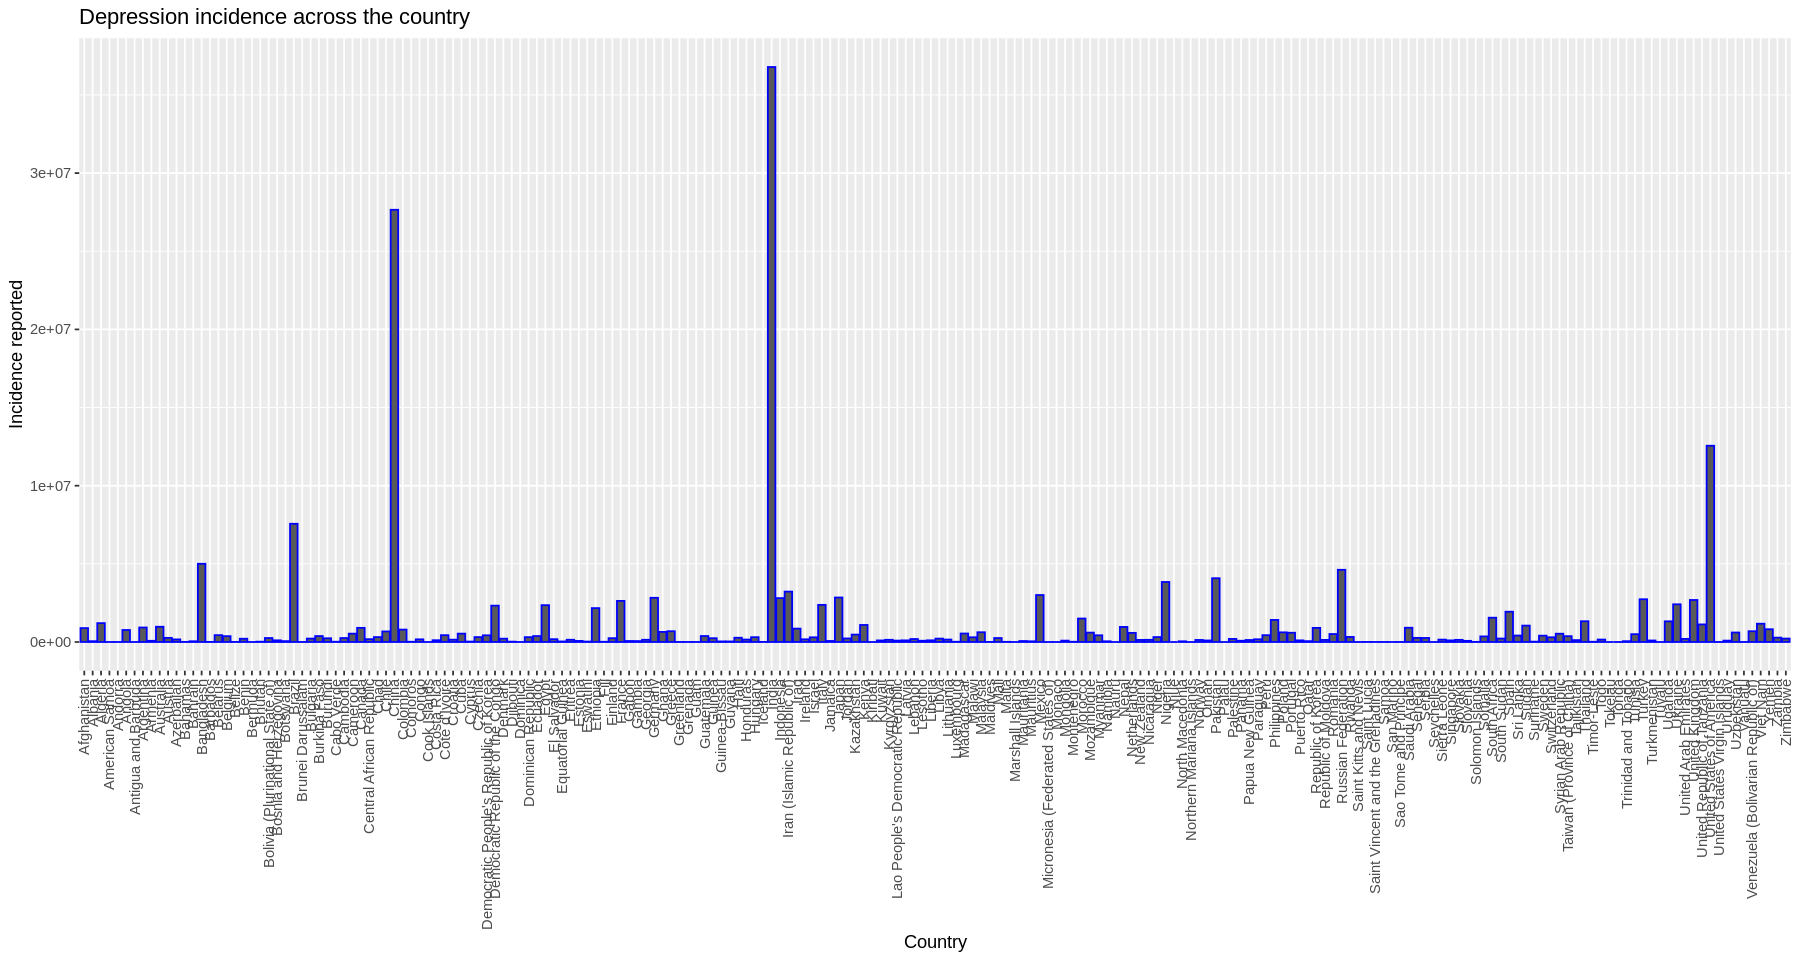

In [ ]:
##Plotting each country vs incidence cases reported per country
p <- p + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
p

In [ ]:
##Top 3 countries with incidence of depression reported.
df[order(-df$dep_incidence),][1:3,]


location_name,dep_incidence
<chr>,<dbl>
India,36786348
China,27652537
United States of America,12556941


In [ ]:
library("readxl")
##Reading the input files for understanding income-level of country's relation with depression
depressionCount = read_excel("/content/MentalhealthData.xlsx", sheet="number-with-depression-by-count")

wbc <- read.csv('/content/worldbankclassification.csv')

In [ ]:
##Left join to get the total incidence per country 
prev_data <- depressionCount  %>% left_join(df, by = c("Entity" = "location_name"))

#renaming the column
t <- rename(prev_data, prevalence =  `Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)`)


In [ ]:
##Left join to get income group and region of each country from World Bank data
prev <- t %>% left_join(wbc, by = c("Entity" = "Country"))

In [ ]:
prev_data <- prev %>% select('Entity', 'Year', 'prevalence','Income.group','Region')

In [ ]:
##checking for missing values and omiting if any
prev_data <- na.omit(prev_data)

sum(is.na(prev_data))

[1] 0

In [ ]:
#Getting mean value of countries across income group, to understand the relation of income group and depression
preval_data <- prev_data %>% group_by(Entity,Income.group) %>% summarise(prevalence = mean(prevalence))

`summarise()` has grouped output by 'Entity'. You can override using the `.groups` argument.



In [ ]:
##Filtering unwanted data
data <- preval_data %>% filter(!grepl('World|Middle SDI|East Asia|Southeast Asia, East Asia, and Oceania|High-middle SDI|
South Asia|High SDI|Low-middle SDI|High-income|Low SDI|Sub-Saharan Africa|Western Europe|North Africa and Middle East|
Central Europe, Eastern Europe, and Central Asia|North America|Southeast Asia|Latin America and Caribbean|Central Europe, Eastern Europe, and Central Asia|South Asia',Entity	))

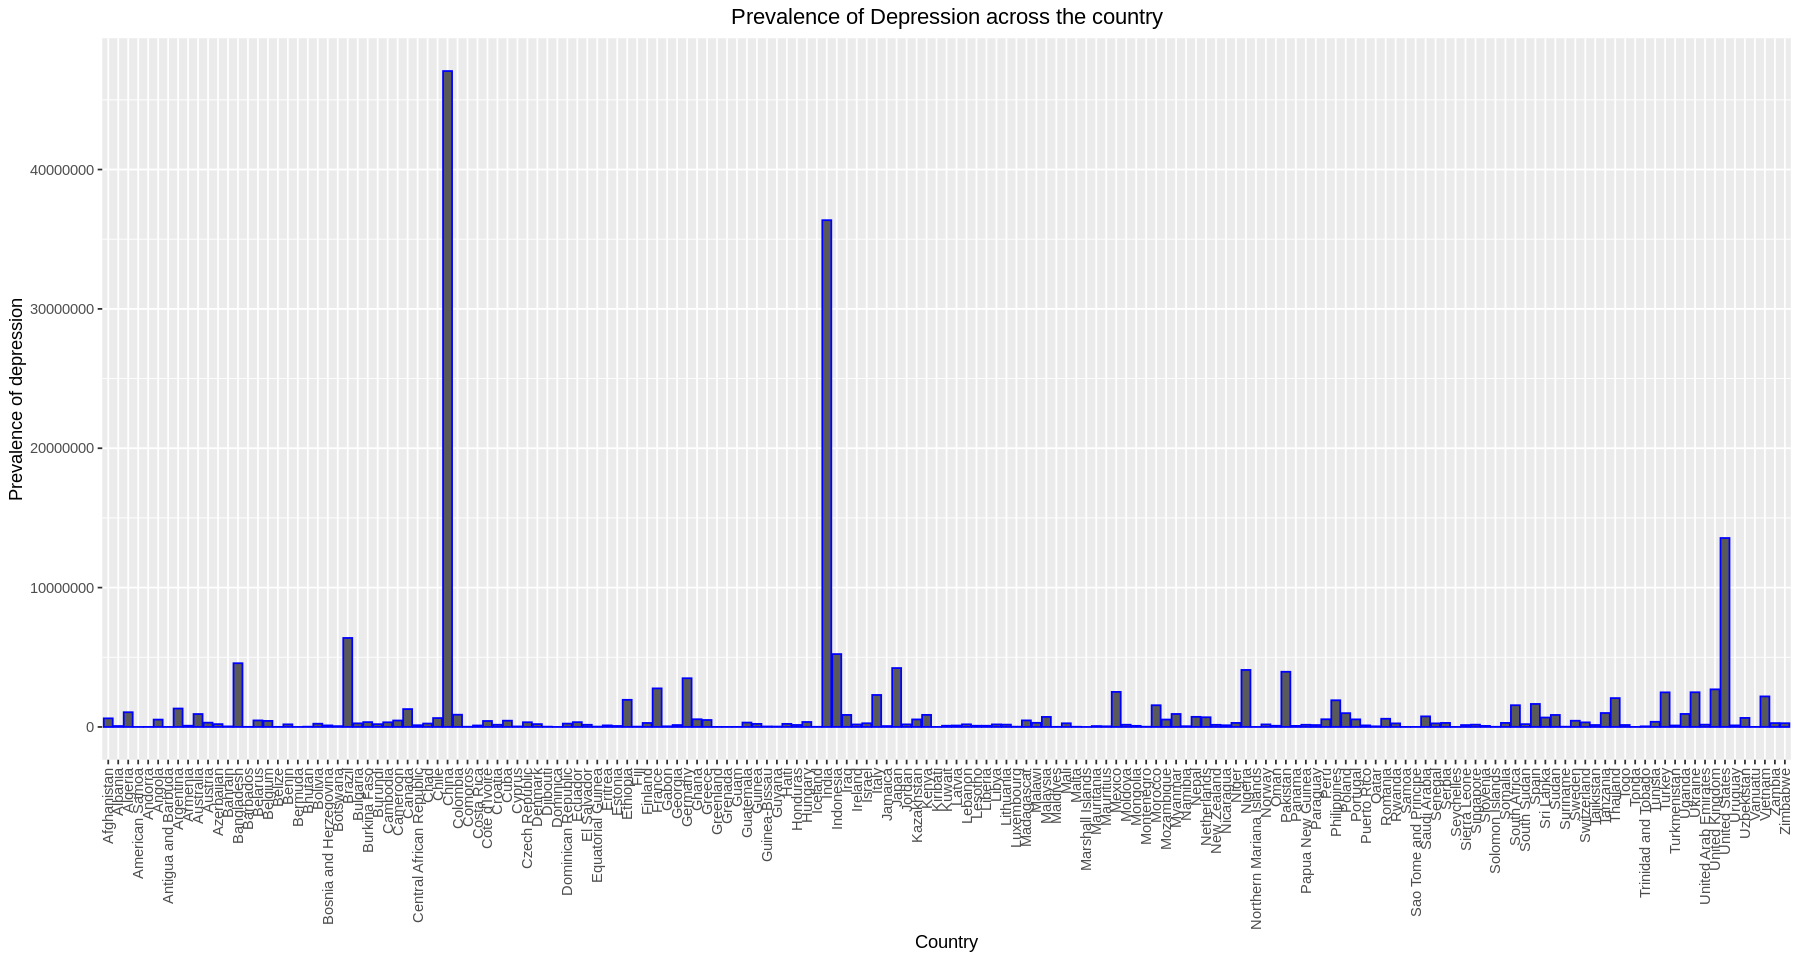

In [ ]:
###Plotting Prevalence of Depression across the country
p<-ggplot(data,aes(x=Entity,y=prevalence))+geom_bar(color='blue' ,stat = "identity")+labs(x="Country",
y="Prevalence of depression",title="Prevalence of Depression across the country") + 
  theme(plot.title = element_text(hjust = 0.5))

p <- p + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
p

In [ ]:
###Top 3 countries with prevalence of depression

data[order(-data$prevalence),][1:3,]

Entity,Income.group,prevalence
<chr>,<chr>,<dbl>
China,Upper middle income,47066531
India,Lower middle income,36364488
United States,High income,13557739


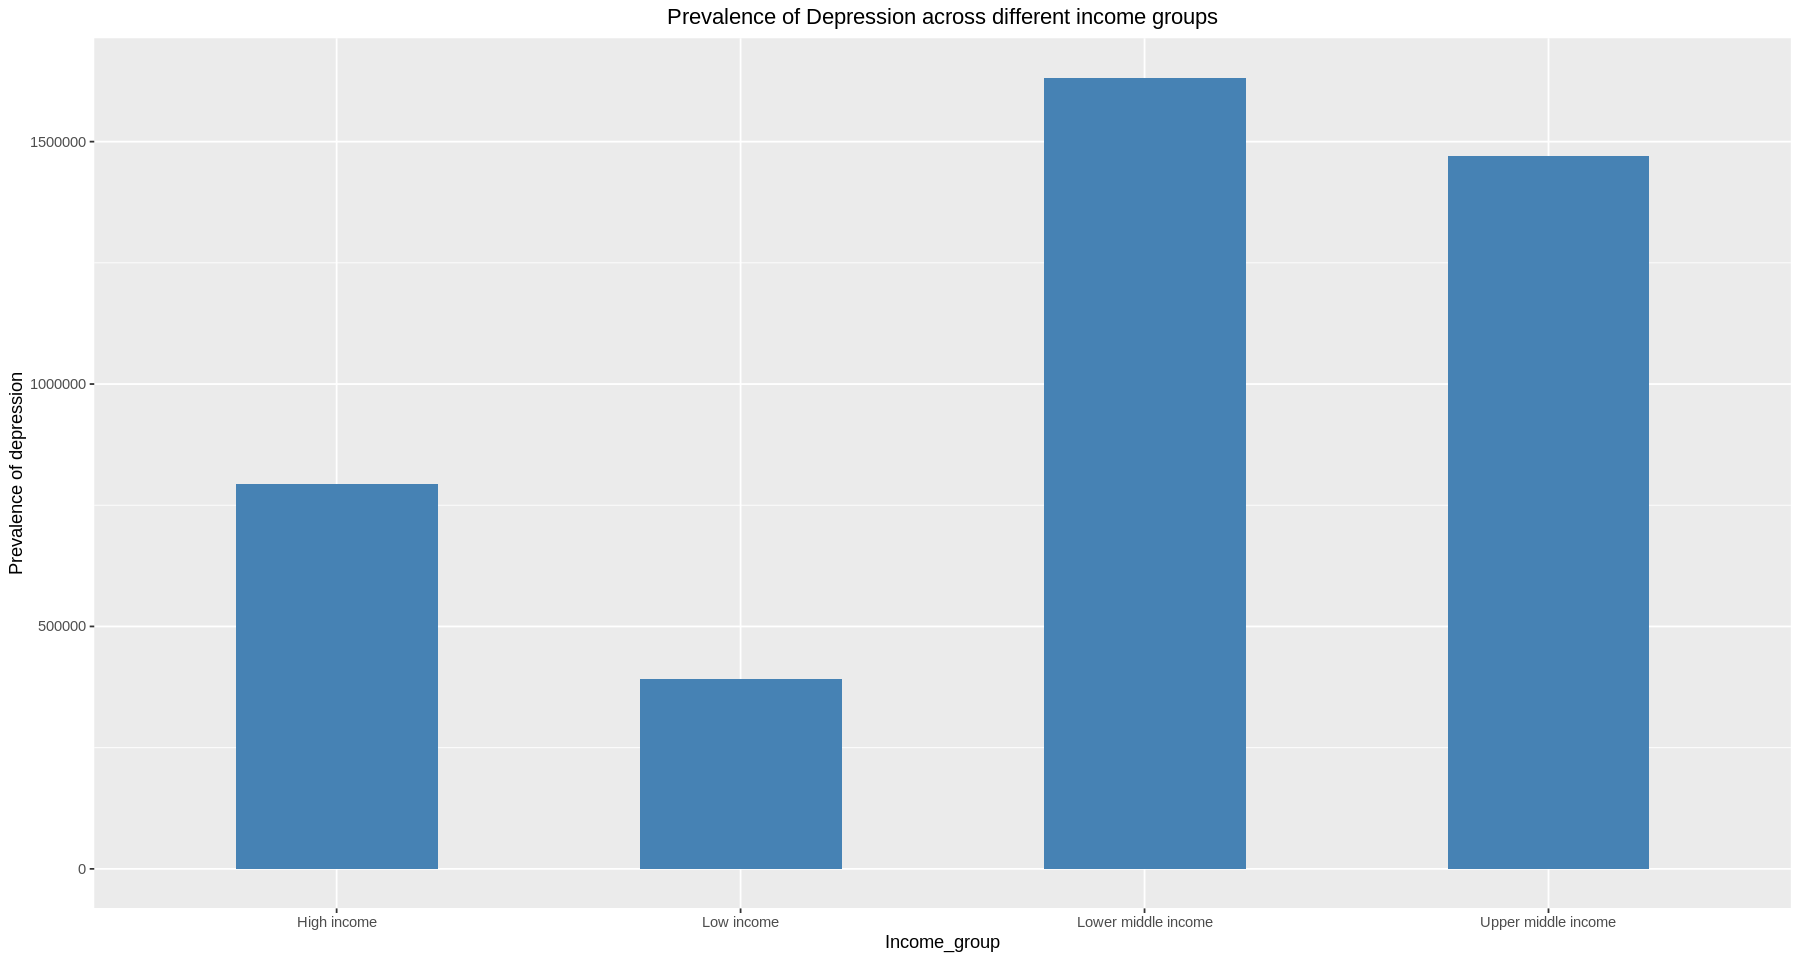

In [ ]:
##group by Income.group to understand relation between income.group and depression prevalence
income_data <- preval_data %>% group_by(Income.group) %>% summarise(prevalence = mean(prevalence))

p<-ggplot(income_data,aes(x=Income.group,y=prevalence))+
geom_bar(fill="steelblue" ,stat = "identity", width = 0.5)+labs(x="Income_group",
y="Prevalence of depression",title="Prevalence of Depression across different income groups") + 
  theme(plot.title = element_text(hjust = 0.5))

p

In [ ]:
##Lowest income group has least prevalence of depression.However, thhis could simply mean lack of facilities in
##such low income countries and has cases reported are also less.
prev_data %>% group_by(Income.group) %>% summarise(n=n())

Income.group,n
<chr>,<int>
High income,1484
Low income,616
Lower middle income,1260
Upper middle income,1372


In [ ]:
prev_data$Income.group <- as.factor(prev_data$Income.group)

In [112]:
lm.all <- lm(prevalence ~ Income.group,data=prev_data)
summary(lm.all)


Call:
lm(formula = prevalence ~ Income.group, data = prev_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1629733 -1361181  -770879  -205563 54894749 

Coefficients:
                                Estimate Std. Error t value       Pr(>|t|)    
(Intercept)                       793004     122566   6.470 0.000000000108 ***
Income.groupLow income           -402077     226303  -1.777        0.07568 .  
Income.groupLower middle income   838632     180875   4.637 0.000003638529 ***
Income.groupUpper middle income   677182     176837   3.829        0.00013 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4722000 on 4728 degrees of freedom
Multiple R-squared:  0.009179,	Adjusted R-squared:  0.008551 
F-statistic:  14.6 on 3 and 4728 DF,  p-value: 0.000000001831


In [ ]:
#Reading input file
wbr <- read.csv('/content/WorldBankRegions.csv')

In [ ]:
wbr1 <- wbr %>% filter(measure=="Incidence")
options(scipen = 999)


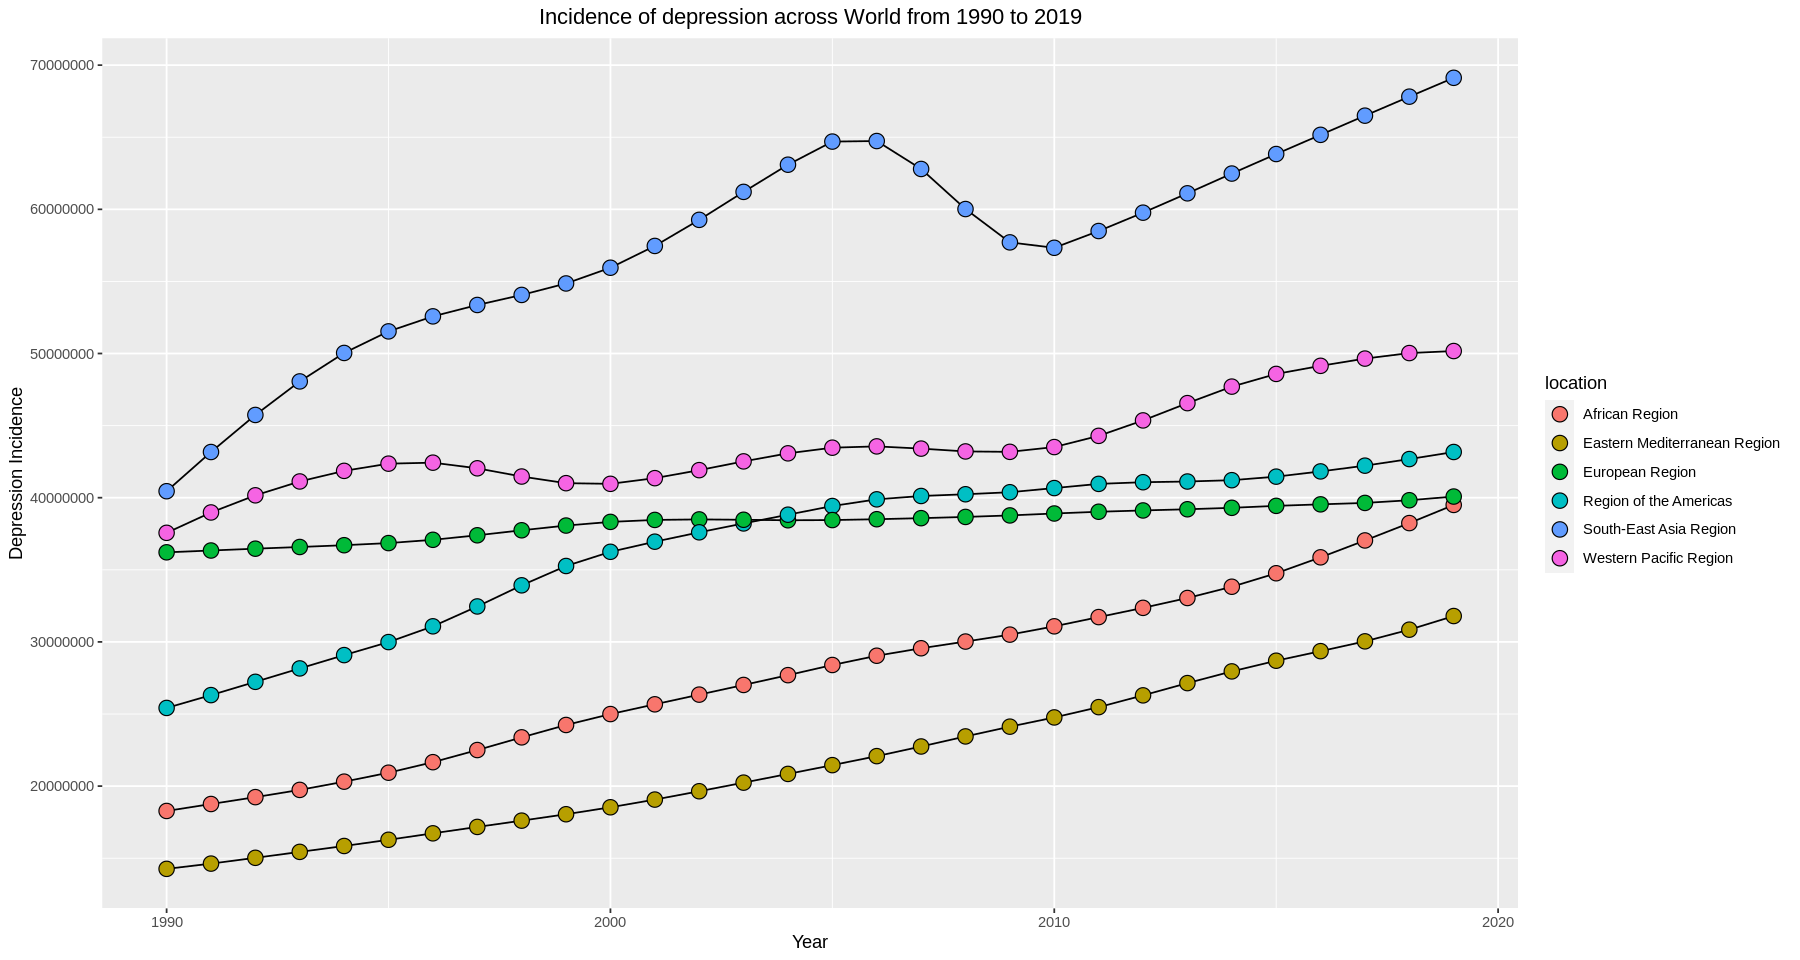

In [ ]:
##Incidence of depression across World Regions from 1990 to 2019
ggplot(wbr1, aes(x = year, y = val, fill = location, group = location)) +
  geom_line()+
  geom_point(size = 4, shape = 21)+labs(x="Year",y="Depression Incidence", 
  title = "Incidence of depression across World from 1990 to 2019") + 
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
wbr2 <- wbr %>% filter(measure=="Prevalence")
options(scipen = 999)

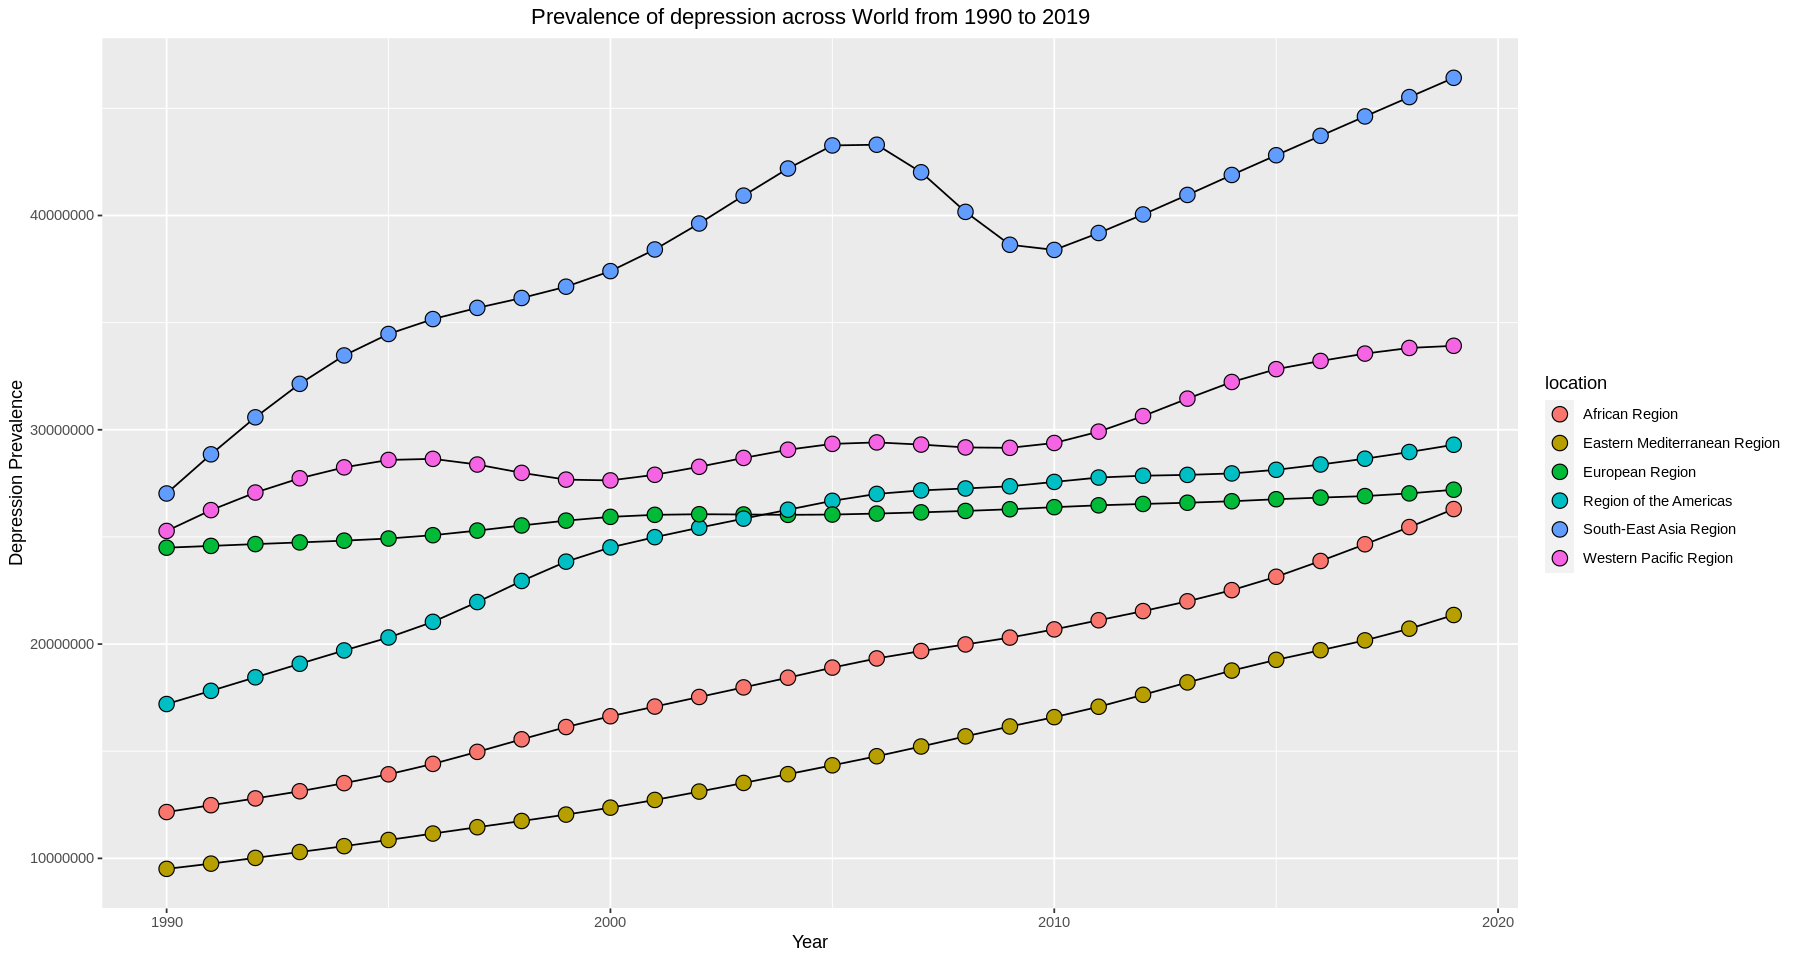

In [ ]:
##Prevalence of depression across World Regions from 1990 to 2019
ggplot(wbr2, aes(x = year, y = val, fill = location, group = location)) +
  geom_line()+
  geom_point(size = 4, shape = 21) +labs(x="Year",y="Depression Prevalence", 
  title = "Prevalence of depression across World from 1990 to 2019") + 
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
ibr <- read.csv('/content/income-based-regions.csv')

In [ ]:
head(ibr)

,measure,location,sex,age,cause,metric,year,val,upper,lower
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Prevalence,World Bank High Income,Both,All Ages,Major depressive disorder,Number,1990,26637372,29483098,23921613
2,Prevalence,World Bank Upper Middle Income,Both,All Ages,Major depressive disorder,Number,1990,40459053,46131033,35243129
3,Prevalence,World Bank Lower Middle Income,Both,All Ages,Major depressive disorder,Number,1990,40920828,47070289,35527358
4,Prevalence,World Bank Low Income,Both,All Ages,Major depressive disorder,Number,1991,8176572,9545530,6955696
5,Prevalence,World Bank Low Income,Both,All Ages,Major depressive disorder,Number,1992,8420231,9828113,7168548
6,Prevalence,World Bank High Income,Both,All Ages,Major depressive disorder,Number,1991,26968566,29814196,24294080


In [ ]:
#unique(ibr$location)
ibr1 <- ibr %>% filter(measure=="Incidence")

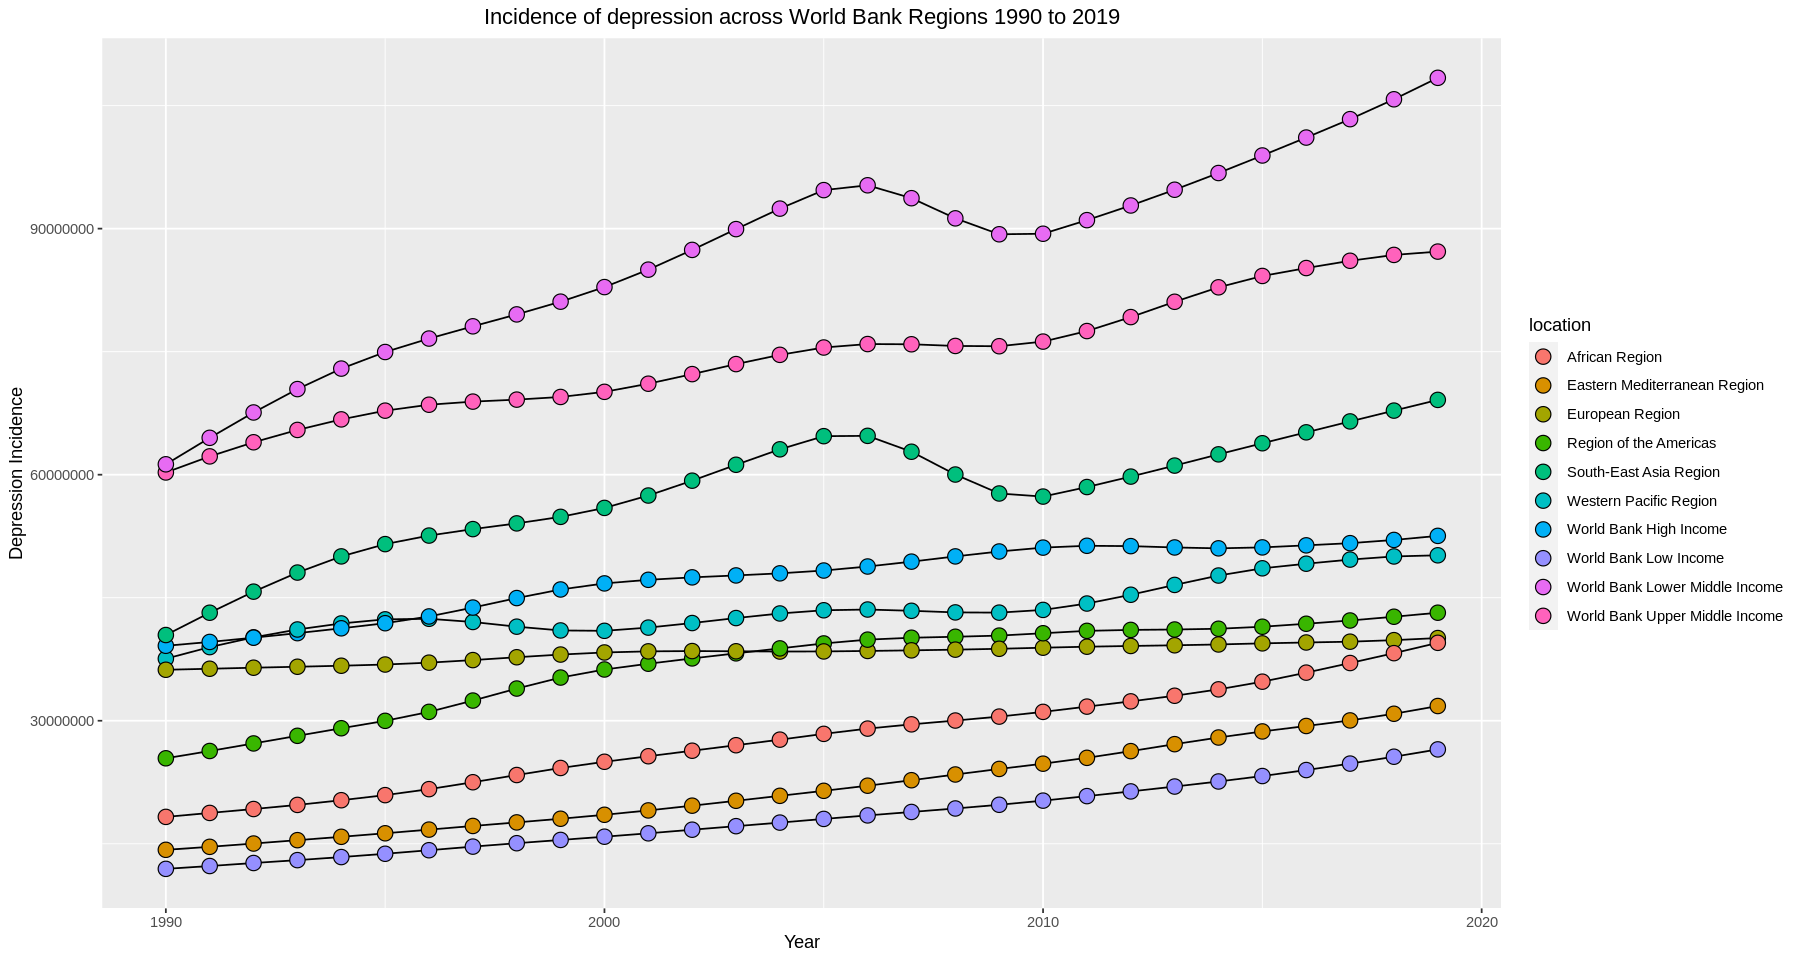

In [ ]:
ggplot(ibr1, aes(x = year, y = val, fill = location, group = location)) +
  geom_line()+
  geom_point(size = 4, shape = 21)+labs(x="Year",y="Depression Incidence", 
  title = "Incidence of depression across World Bank Regions 1990 to 2019") + 
  theme(plot.title = element_text(hjust = 0.5))